In [1]:
import matplotlib.pyplot as plt
import numpy as np

import data_handling
import utils
from gaussian_spectral_clustering import (compute_pcs_and_project,
                                          initial_class_assignment,
                                          iterate_clustering,
                                          compute_class_statistics,
                                          compute_posterior_probability_and_assign,
                                          compute_multivariate_gaussian_statistics
                                         )
%matplotlib inline

In [2]:
# matplotlib settings for figure size and colormap
plt.rcParams['figure.figsize'] = [20, 15];
plt.rcParams['image.cmap'] = plt.gray();

<Figure size 1440x1080 with 0 Axes>

In [3]:
hsi_data_mat, sz, truth_data_mat = data_handling.load_aviris_data('sample-data-master/92AV3C.lan')

## Compute PCs and Project

In [4]:
x_pca, eig_vecs = compute_pcs_and_project(hsi_data_mat)

In [5]:
def reshape_pca_band(X, band, sz):
    nl, ns, nb = sz
    # return X.transpose().reshape([nl, ns, nb], order='F')[:, :, band]
    return X[band, :].reshape([nl, ns], order='F')

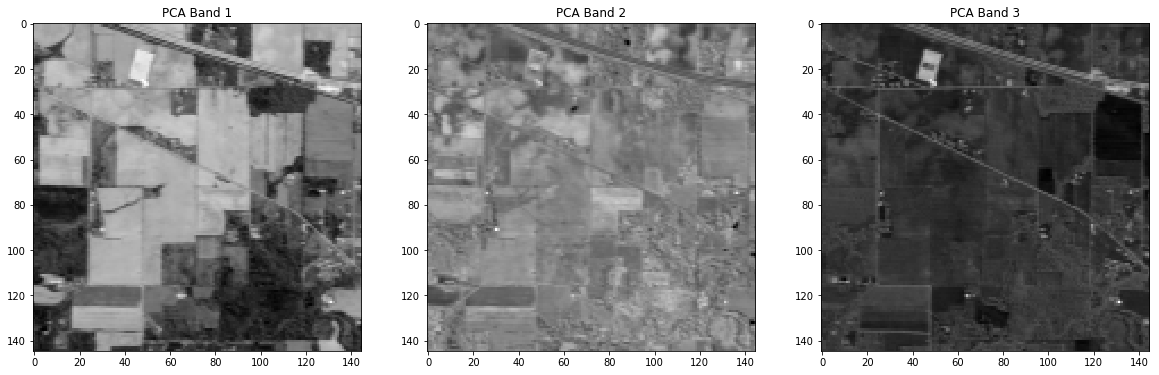

In [23]:
# Plot various bands from the image
# Squeeze() is needed to remove the single-dimensional band dimension
# before plotting (e.g. (nl, ns, 1) -> (nl, ns))
f, (plot1, plot2, plot3) = plt.subplots(1, 3)
plot1.imshow(reshape_pca_band(x_pca, 0, sz), cmap=plt.gray());
plot1.set_title('PCA Band 1');

plot2.imshow(reshape_pca_band(x_pca, 1, sz), cmap=plt.gray());
plot2.set_title('PCA Band 2');

plot3.imshow(reshape_pca_band(x_pca, 2, sz), cmap=plt.gray());
plot3.set_title('PCA Band 3');


## Split data into leading and trailing-order PCs

In [7]:
# Number of leading order PCs (i.e. bands [0, K])
K = 10

leading_order_pcs = x_pca[:K, :]
trailing_order_pcs = x_pca[K:, :]

## (Optional) Cull Pixels

In [8]:
outlier_ixs, valid_ixs = compute_multivariate_gaussian_statistics(trailing_order_pcs)
print('Number of outliers: {}'.format(outlier_ixs.shape))

Number of outliers: (31,)


In [9]:
leading_order_pcs_masked = leading_order_pcs[:, valid_ixs]
#leading_order_pcs_masked = np.delete(leading_order_pcs, outlier_ixs, axis=1)

## Initial Class Assignment (leading-order PCs)

In [10]:
num_classes = 7

In [11]:
np.random.seed(12345)
cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes)

In [12]:
cmi_masked, cm_masked, cc_masked = initial_class_assignment(leading_order_pcs_masked, num_classes)

In [13]:
#cmi, cm, cc = initial_class_assignment(leading_order_pcs, num_classes, method='select', init_indices=[blue_ix[0], brown_ix[0], camo_ix[0], white_ix[0], black_ix[0], background_ix[500], background_ix[50000]])

In [29]:
%%timeit
#np.random.seed(12345)


final_class_ixs = iterate_clustering(leading_order_pcs, cmi, num_classes, 300)

class counts [2950 2932 3041 3075 2886 3104 3037]
Finished iteration # 0
class counts [3015 2513 3303 3481 2462 3319 2932]
Finished iteration # 1
class counts [3113 2464 3563 3932 1893 3153 2907]
Finished iteration # 2
class counts [3211 2402 4185 3866 1500 2827 3034]
Finished iteration # 3
class counts [3863 1945 5151 3362 1277 2541 2886]
Finished iteration # 4
class counts [4545 1452 5773 2861 1350 2483 2561]
Finished iteration # 5
class counts [4640 1312 5886 2736 1569 2437 2445]
Finished iteration # 6
class counts [4483 1278 5822 2770 1819 2403 2450]
Finished iteration # 7
class counts [4294 1252 5649 2806 2089 2377 2558]
Finished iteration # 8
class counts [4154 1268 5505 2801 2303 2336 2658]
Finished iteration # 9
class counts [4046 1308 5364 2772 2484 2323 2728]
Finished iteration # 10
class counts [3950 1341 5231 2784 2622 2296 2801]
Finished iteration # 11
class counts [3884 1414 5149 2755 2765 2256 2802]
Finished iteration # 12
class counts [3825 1440 5096 2743 2870 2226 2825

class counts [3598 2648 3909 1724 3795 1401 3950]
Finished iteration # 114
class counts [3589 2648 3914 1696 3825 1396 3957]
Finished iteration # 115
class counts [3583 2646 3929 1697 3829 1415 3926]
Finished iteration # 116
class counts [3584 2652 3905 1679 3844 1406 3955]
Finished iteration # 117
class counts [3621 2690 3899 1699 3778 1392 3946]
Finished iteration # 118
class counts [3602 2650 3877 1715 3791 1402 3988]
Finished iteration # 119
class counts [3622 2691 3897 1705 3743 1407 3960]
Finished iteration # 120
class counts [3604 2698 3879 1729 3743 1398 3974]
Finished iteration # 121
class counts [3583 2676 3900 1727 3760 1404 3975]
Finished iteration # 122
class counts [3588 2671 3897 1706 3767 1424 3972]
Finished iteration # 123
class counts [3570 2680 3909 1703 3800 1421 3942]
Finished iteration # 124
class counts [3571 2687 3891 1705 3799 1415 3957]
Finished iteration # 125
class counts [3604 2720 3898 1677 3774 1407 3945]
Finished iteration # 126
class counts [3592 2731 3

class counts [3595 2690 3829 1789 3681 1421 4020]
Finished iteration # 229
class counts [3618 2693 3847 1801 3645 1430 3991]
Finished iteration # 230
class counts [3588 2686 3798 1798 3678 1445 4032]
Finished iteration # 231
class counts [3627 2681 3816 1773 3655 1452 4021]
Finished iteration # 232
class counts [3615 2664 3835 1743 3707 1449 4012]
Finished iteration # 233
class counts [3600 2656 3852 1738 3746 1437 3996]
Finished iteration # 234
class counts [3584 2652 3860 1757 3744 1431 3997]
Finished iteration # 235
class counts [3590 2666 3868 1743 3752 1432 3974]
Finished iteration # 236
class counts [3573 2640 3846 1746 3803 1419 3998]
Finished iteration # 237
class counts [3578 2642 3858 1776 3764 1409 3998]
Finished iteration # 238
class counts [3610 2650 3829 1743 3745 1420 4028]
Finished iteration # 239
class counts [3598 2671 3840 1737 3762 1411 4006]
Finished iteration # 240
class counts [3601 2675 3843 1740 3763 1402 4001]
Finished iteration # 241
class counts [3582 2689 3

class counts [3637 2139 4953 2373 3764 1367 2792]
Finished iteration # 40
class counts [3646 2131 4890 2332 3809 1345 2872]
Finished iteration # 41
class counts [3667 2192 4838 2283 3803 1338 2904]
Finished iteration # 42
class counts [3675 2219 4852 2211 3808 1346 2914]
Finished iteration # 43
class counts [3672 2215 4840 2184 3856 1329 2929]
Finished iteration # 44
class counts [3670 2217 4801 2180 3846 1349 2962]
Finished iteration # 45
class counts [3697 2243 4743 2111 3883 1331 3017]
Finished iteration # 46
class counts [3702 2269 4696 2095 3874 1326 3063]
Finished iteration # 47
class counts [3710 2281 4649 2063 3873 1341 3108]
Finished iteration # 48
class counts [3731 2297 4606 2047 3876 1316 3152]
Finished iteration # 49
class counts [3703 2308 4590 2011 3899 1329 3185]
Finished iteration # 50
class counts [3707 2301 4491 1990 3894 1341 3301]
Finished iteration # 51
class counts [3715 2358 4459 1989 3857 1330 3317]
Finished iteration # 52
class counts [3700 2396 4397 1979 3861

class counts [3620 2618 3906 1798 3755 1382 3946]
Finished iteration # 154
class counts [3626 2610 3890 1815 3720 1400 3964]
Finished iteration # 155
class counts [3592 2625 3884 1774 3806 1386 3958]
Finished iteration # 156
class counts [3579 2620 3844 1759 3857 1363 4003]
Finished iteration # 157
class counts [3586 2626 3861 1774 3836 1366 3976]
Finished iteration # 158
class counts [3606 2598 3854 1779 3839 1361 3988]
Finished iteration # 159
class counts [3586 2586 3852 1729 3901 1370 4001]
Finished iteration # 160
class counts [3611 2601 3849 1718 3875 1362 4009]
Finished iteration # 161
class counts [3596 2589 3856 1725 3874 1374 4011]
Finished iteration # 162
class counts [3603 2609 3880 1731 3865 1371 3966]
Finished iteration # 163
class counts [3596 2619 3860 1770 3804 1394 3982]
Finished iteration # 164
class counts [3627 2629 3831 1778 3767 1379 4014]
Finished iteration # 165
class counts [3600 2628 3845 1755 3812 1386 3999]
Finished iteration # 166
class counts [3617 2634 3

class counts [3611 2631 3885 1766 3777 1382 3973]
Finished iteration # 268
class counts [3594 2661 3879 1779 3762 1387 3963]
Finished iteration # 269
class counts [3604 2646 3854 1758 3778 1391 3994]
Finished iteration # 270
class counts [3596 2629 3842 1753 3817 1394 3994]
Finished iteration # 271
class counts [3587 2613 3858 1765 3819 1387 3996]
Finished iteration # 272
class counts [3579 2641 3848 1766 3808 1390 3993]
Finished iteration # 273
class counts [3571 2620 3871 1737 3820 1402 4004]
Finished iteration # 274
class counts [3590 2620 3895 1765 3776 1405 3974]
Finished iteration # 275
class counts [3597 2647 3874 1769 3735 1405 3998]
Finished iteration # 276
class counts [3597 2650 3841 1777 3727 1397 4036]
Finished iteration # 277
class counts [3603 2669 3863 1752 3742 1394 4002]
Finished iteration # 278
class counts [3591 2687 3786 1747 3748 1401 4065]
Finished iteration # 279
class counts [3580 2710 3797 1719 3753 1416 4050]
Finished iteration # 280
class counts [3588 2697 3

class counts [3549 2645 3838 1791 3803 1389 4010]
Finished iteration # 81
class counts [3576 2637 3852 1806 3761 1399 3994]
Finished iteration # 82
class counts [3571 2652 3853 1790 3770 1373 4016]
Finished iteration # 83
class counts [3578 2672 3830 1760 3806 1368 4011]
Finished iteration # 84
class counts [3592 2654 3834 1733 3834 1370 4008]
Finished iteration # 85
class counts [3592 2677 3842 1756 3818 1363 3977]
Finished iteration # 86
class counts [3627 2711 3839 1773 3734 1360 3981]
Finished iteration # 87
class counts [3609 2676 3861 1750 3788 1366 3975]
Finished iteration # 88
class counts [3603 2650 3849 1766 3798 1357 4002]
Finished iteration # 89
class counts [3598 2613 3807 1784 3782 1377 4064]
Finished iteration # 90
class counts [3594 2646 3784 1772 3784 1377 4068]
Finished iteration # 91
class counts [3577 2629 3852 1798 3781 1384 4004]
Finished iteration # 92
class counts [3576 2655 3820 1741 3829 1387 4017]
Finished iteration # 93
class counts [3576 2667 3834 1731 3806

class counts [3616 2710 3842 1693 3710 1408 4046]
Finished iteration # 195
class counts [3613 2668 3837 1681 3770 1404 4052]
Finished iteration # 196
class counts [3598 2682 3839 1684 3780 1398 4044]
Finished iteration # 197
class counts [3618 2691 3840 1673 3760 1401 4042]
Finished iteration # 198
class counts [3604 2696 3848 1689 3768 1392 4028]
Finished iteration # 199
class counts [3601 2666 3866 1673 3793 1399 4027]
Finished iteration # 200
class counts [3586 2679 3823 1690 3826 1385 4036]
Finished iteration # 201
class counts [3594 2691 3818 1701 3783 1396 4042]
Finished iteration # 202
class counts [3594 2703 3844 1685 3802 1388 4009]
Finished iteration # 203
class counts [3601 2718 3894 1674 3793 1388 3957]
Finished iteration # 204
class counts [3591 2696 3861 1705 3787 1390 3995]
Finished iteration # 205
class counts [3612 2720 3852 1703 3757 1406 3975]
Finished iteration # 206
class counts [3593 2648 3843 1723 3792 1398 4028]
Finished iteration # 207
class counts [3604 2662 3

class counts [3052 1464 7295 3567 1814 1987 1846]
Finished iteration # 9
class counts [2842 1434 7219 3654 1998 1917 1961]
Finished iteration # 10
class counts [2667 1431 7138 3745 2116 1866 2062]
Finished iteration # 11
class counts [2523 1431 7050 3761 2260 1801 2199]
Finished iteration # 12
class counts [2384 1433 7005 3787 2368 1802 2246]
Finished iteration # 13
class counts [2300 1468 6925 3800 2430 1771 2331]
Finished iteration # 14
class counts [2226 1481 6876 3776 2562 1737 2367]
Finished iteration # 15
class counts [2150 1527 6824 3788 2629 1732 2375]
Finished iteration # 16
class counts [2132 1564 6787 3803 2668 1683 2388]
Finished iteration # 17
class counts [2112 1597 6743 3767 2744 1669 2393]
Finished iteration # 18
class counts [2155 1612 6715 3717 2798 1661 2367]
Finished iteration # 19
class counts [2154 1642 6704 3671 2868 1688 2298]
Finished iteration # 20
class counts [2191 1651 6691 3599 2956 1679 2258]
Finished iteration # 21
class counts [2182 1656 6664 3573 3030 

class counts [2742 2122 3879 3412 3712 1221 3937]
Finished iteration # 123
class counts [2761 2121 3897 3408 3715 1208 3915]
Finished iteration # 124
class counts [2776 2161 3877 3403 3693 1199 3916]
Finished iteration # 125
class counts [2776 2147 3918 3414 3667 1215 3888]
Finished iteration # 126
class counts [2762 2144 3918 3392 3679 1217 3913]
Finished iteration # 127
class counts [2762 2182 3886 3393 3670 1202 3930]
Finished iteration # 128
class counts [2747 2204 3836 3404 3667 1198 3969]
Finished iteration # 129
class counts [2773 2172 3847 3389 3698 1179 3967]
Finished iteration # 130
class counts [2768 2164 3861 3398 3666 1198 3970]
Finished iteration # 131
class counts [2787 2185 3860 3389 3668 1190 3946]
Finished iteration # 132
class counts [2770 2187 3846 3383 3685 1189 3965]
Finished iteration # 133
class counts [2796 2158 3835 3370 3673 1198 3995]
Finished iteration # 134
class counts [2782 2163 3882 3368 3699 1179 3952]
Finished iteration # 135
class counts [2819 2167 3

class counts [2732 2216 3900 3369 3680 1150 3978]
Finished iteration # 238
class counts [2720 2236 3905 3392 3658 1151 3963]
Finished iteration # 239
class counts [2741 2225 3919 3384 3668 1144 3944]
Finished iteration # 240
class counts [2720 2232 3876 3400 3661 1152 3984]
Finished iteration # 241
class counts [2705 2266 3868 3393 3645 1161 3987]
Finished iteration # 242
class counts [2691 2270 3866 3395 3658 1168 3977]
Finished iteration # 243
class counts [2696 2305 3866 3396 3636 1164 3962]
Finished iteration # 244
class counts [2669 2331 3900 3401 3636 1169 3919]
Finished iteration # 245
class counts [2658 2354 3883 3399 3658 1165 3908]
Finished iteration # 246
class counts [2668 2275 3883 3389 3700 1172 3938]
Finished iteration # 247
class counts [2702 2290 3868 3389 3665 1163 3948]
Finished iteration # 248
class counts [2710 2277 3865 3380 3668 1154 3971]
Finished iteration # 249
class counts [2703 2266 3864 3390 3676 1149 3977]
Finished iteration # 250
class counts [2715 2262 3

class counts [2653 2076 5932 3340 3403 1421 2200]
Finished iteration # 52
class counts [2667 2066 5921 3328 3397 1425 2221]
Finished iteration # 53
class counts [2682 2056 5907 3336 3415 1419 2210]
Finished iteration # 54
class counts [2715 2080 5858 3350 3382 1421 2219]
Finished iteration # 55
class counts [2729 2055 5870 3349 3386 1423 2213]
Finished iteration # 56
class counts [2736 2043 5852 3344 3393 1426 2231]
Finished iteration # 57
class counts [2749 2005 5865 3344 3409 1431 2222]
Finished iteration # 58
class counts [2757 2004 5861 3352 3401 1424 2226]
Finished iteration # 59
class counts [2784 2046 5817 3335 3378 1424 2241]
Finished iteration # 60
class counts [2748 2022 5745 3367 3421 1418 2304]
Finished iteration # 61
class counts [2713 2040 5746 3387 3437 1419 2283]
Finished iteration # 62
class counts [2736 2036 5744 3390 3429 1413 2277]
Finished iteration # 63
class counts [2756 2033 5695 3394 3417 1423 2307]
Finished iteration # 64
class counts [2777 2032 5664 3383 3441

class counts [2820 2192 3832 3370 3636 1172 4003]
Finished iteration # 164
class counts [2800 2206 3828 3394 3628 1174 3995]
Finished iteration # 165
class counts [2810 2187 3817 3382 3662 1147 4020]
Finished iteration # 166
class counts [2845 2155 3862 3374 3655 1145 3989]
Finished iteration # 167
class counts [2820 2181 3864 3381 3666 1143 3970]
Finished iteration # 168
class counts [2802 2217 3863 3390 3638 1152 3963]
Finished iteration # 169
class counts [2834 2191 3849 3392 3620 1152 3987]
Finished iteration # 170
class counts [2842 2179 3877 3389 3637 1146 3955]
Finished iteration # 171
class counts [2815 2192 3876 3394 3667 1140 3941]
Finished iteration # 172
class counts [2817 2190 3882 3374 3684 1141 3937]
Finished iteration # 173
class counts [2834 2221 3855 3368 3650 1159 3938]
Finished iteration # 174
class counts [2833 2200 3824 3369 3663 1166 3970]
Finished iteration # 175
class counts [2788 2192 3831 3370 3730 1141 3973]
Finished iteration # 176
class counts [2778 2172 3

class counts [2602 2338 3894 3382 3850 1055 3904]
Finished iteration # 277
class counts [2599 2353 3930 3369 3857 1050 3867]
Finished iteration # 278
class counts [2594 2337 3881 3382 3851 1052 3928]
Finished iteration # 279
class counts [2643 2324 3887 3386 3807 1053 3925]
Finished iteration # 280
class counts [2649 2292 3911 3365 3838 1052 3918]
Finished iteration # 281
class counts [2660 2292 3896 3381 3826 1039 3931]
Finished iteration # 282
class counts [2630 2270 3883 3372 3871 1041 3958]
Finished iteration # 283
class counts [2651 2282 3899 3370 3844 1048 3931]
Finished iteration # 284
class counts [2660 2319 3924 3389 3784 1050 3899]
Finished iteration # 285
class counts [2665 2327 3915 3400 3763 1060 3895]
Finished iteration # 286
class counts [2678 2304 3889 3382 3764 1059 3949]
Finished iteration # 287
class counts [2692 2323 3891 3399 3708 1074 3938]
Finished iteration # 288
class counts [2696 2354 3886 3395 3681 1077 3936]
Finished iteration # 289
class counts [2660 2324 3

class counts [3649 2676 3897 1705 3752 1417 3929]
Finished iteration # 91
class counts [3657 2659 3874 1743 3712 1420 3960]
Finished iteration # 92
class counts [3643 2663 3860 1733 3748 1408 3970]
Finished iteration # 93
class counts [3621 2640 3874 1755 3759 1415 3961]
Finished iteration # 94
class counts [3629 2652 3829 1762 3748 1403 4002]
Finished iteration # 95
class counts [3620 2679 3862 1761 3730 1400 3973]
Finished iteration # 96
class counts [3619 2673 3864 1752 3750 1398 3969]
Finished iteration # 97
class counts [3592 2673 3866 1751 3783 1384 3976]
Finished iteration # 98
class counts [3592 2684 3879 1761 3768 1377 3964]
Finished iteration # 99
class counts [3587 2676 3858 1760 3777 1373 3994]
Finished iteration # 100
class counts [3599 2691 3869 1772 3732 1369 3993]
Finished iteration # 101
class counts [3583 2660 3878 1747 3793 1377 3987]
Finished iteration # 102
class counts [3575 2665 3880 1737 3795 1387 3986]
Finished iteration # 103
class counts [3576 2680 3902 1750 

class counts [3605 2620 3806 1806 3778 1376 4034]
Finished iteration # 203
class counts [3599 2590 3817 1798 3788 1390 4043]
Finished iteration # 204
class counts [3619 2598 3819 1779 3796 1372 4042]
Finished iteration # 205
class counts [3614 2647 3827 1769 3769 1377 4022]
Finished iteration # 206
class counts [3585 2649 3812 1780 3776 1375 4048]
Finished iteration # 207
class counts [3578 2643 3803 1772 3799 1378 4052]
Finished iteration # 208
class counts [3567 2677 3791 1770 3807 1369 4044]
Finished iteration # 209
class counts [3566 2675 3801 1779 3790 1367 4047]
Finished iteration # 210
class counts [3585 2665 3832 1767 3783 1371 4022]
Finished iteration # 211
class counts [3593 2667 3837 1758 3774 1378 4018]
Finished iteration # 212
class counts [3578 2677 3846 1763 3772 1387 4002]
Finished iteration # 213
class counts [3582 2671 3844 1765 3788 1388 3987]
Finished iteration # 214
class counts [3583 2663 3900 1741 3800 1397 3941]
Finished iteration # 215
class counts [3587 2631 3

class counts [3312 1946 6439 1787 3638 1803 2100]
Finished iteration # 17
class counts [3001 1975 6461 2096 3667 1767 2058]
Finished iteration # 18
class counts [2797 1998 6452 2328 3653 1727 2070]
Finished iteration # 19
class counts [2704 2028 6437 2487 3617 1684 2068]
Finished iteration # 20
class counts [2684 2042 6431 2593 3569 1656 2050]
Finished iteration # 21
class counts [2698 2062 6402 2674 3527 1631 2031]
Finished iteration # 22
class counts [2658 2047 6399 2760 3517 1615 2029]
Finished iteration # 23
class counts [2615 2067 6391 2833 3540 1567 2012]
Finished iteration # 24
class counts [2615 2034 6370 2871 3539 1571 2025]
Finished iteration # 25
class counts [2606 2043 6342 2933 3519 1536 2046]
Finished iteration # 26
class counts [2632 2042 6339 2997 3486 1510 2019]
Finished iteration # 27
class counts [2628 2040 6324 3039 3448 1503 2043]
Finished iteration # 28
class counts [2601 2043 6297 3086 3482 1480 2036]
Finished iteration # 29
class counts [2647 2025 6289 3095 3434

class counts [2761 2207 3901 3408 3661 1183 3904]
Finished iteration # 132
class counts [2785 2221 3838 3400 3643 1177 3961]
Finished iteration # 133
class counts [2773 2237 3858 3386 3663 1181 3927]
Finished iteration # 134
class counts [2791 2181 3865 3364 3716 1180 3928]
Finished iteration # 135
class counts [2806 2201 3827 3386 3655 1187 3963]
Finished iteration # 136
class counts [2770 2174 3852 3382 3705 1193 3949]
Finished iteration # 137
class counts [2781 2173 3845 3375 3675 1216 3960]
Finished iteration # 138
class counts [2766 2208 3800 3362 3670 1217 4002]
Finished iteration # 139
class counts [2698 2209 3848 3376 3745 1200 3949]
Finished iteration # 140
class counts [2714 2201 3840 3384 3740 1180 3966]
Finished iteration # 141
class counts [2712 2174 3866 3390 3751 1179 3953]
Finished iteration # 142
class counts [2732 2180 3891 3374 3715 1192 3941]
Finished iteration # 143
class counts [2729 2196 3866 3378 3717 1174 3965]
Finished iteration # 144
class counts [2752 2188 3

class counts [2778 2154 3898 3393 3758 1148 3896]
Finished iteration # 242
class counts [2776 2175 3853 3398 3718 1181 3924]
Finished iteration # 243
class counts [2836 2145 3864 3373 3710 1167 3930]
Finished iteration # 244
class counts [2843 2156 3912 3364 3689 1168 3893]
Finished iteration # 245
class counts [2835 2151 3914 3376 3711 1151 3887]
Finished iteration # 246
class counts [2805 2122 3934 3385 3727 1161 3891]
Finished iteration # 247
class counts [2812 2129 3919 3388 3720 1160 3897]
Finished iteration # 248
class counts [2823 2154 3901 3379 3718 1162 3888]
Finished iteration # 249
class counts [2814 2139 3908 3384 3717 1167 3896]
Finished iteration # 250
class counts [2826 2187 3927 3377 3681 1167 3860]
Finished iteration # 251
class counts [2801 2156 3920 3375 3717 1179 3877]
Finished iteration # 252
class counts [2781 2151 3859 3377 3742 1172 3943]
Finished iteration # 253
class counts [2780 2150 3898 3381 3738 1169 3909]
Finished iteration # 254
class counts [2756 2141 3

class counts [3617 2560 4274 1885 3826 1347 3516]
Finished iteration # 57
class counts [3643 2569 4212 1872 3768 1360 3601]
Finished iteration # 58
class counts [3628 2565 4188 1885 3787 1358 3614]
Finished iteration # 59
class counts [3642 2539 4142 1892 3777 1368 3665]
Finished iteration # 60
class counts [3641 2547 4105 1859 3809 1370 3694]
Finished iteration # 61
class counts [3621 2554 4093 1870 3811 1380 3696]
Finished iteration # 62
class counts [3633 2570 4063 1873 3807 1357 3722]
Finished iteration # 63
class counts [3633 2567 4038 1861 3801 1378 3747]
Finished iteration # 64
class counts [3622 2571 4039 1853 3803 1373 3764]
Finished iteration # 65
class counts [3615 2582 3998 1845 3770 1389 3826]
Finished iteration # 66
class counts [3631 2589 3984 1801 3782 1388 3850]
Finished iteration # 67
class counts [3630 2590 3994 1809 3780 1388 3834]
Finished iteration # 68
class counts [3640 2572 3942 1767 3795 1397 3912]
Finished iteration # 69
class counts [3632 2609 3956 1759 3793

class counts [3574 2634 3846 1768 3789 1422 3992]
Finished iteration # 167
class counts [3589 2634 3821 1749 3813 1408 4011]
Finished iteration # 168
class counts [3585 2631 3822 1734 3833 1403 4017]
Finished iteration # 169
class counts [3559 2632 3815 1705 3878 1403 4033]
Finished iteration # 170
class counts [3564 2638 3822 1749 3829 1404 4019]
Finished iteration # 171
class counts [3575 2646 3851 1754 3801 1399 3999]
Finished iteration # 172
class counts [3578 2664 3857 1748 3765 1416 3997]
Finished iteration # 173
class counts [3619 2651 3809 1711 3755 1431 4049]
Finished iteration # 174
class counts [3609 2611 3822 1713 3819 1420 4031]
Finished iteration # 175
class counts [3602 2606 3820 1714 3817 1427 4039]
Finished iteration # 176
class counts [3589 2639 3849 1704 3813 1429 4002]
Finished iteration # 177
class counts [3591 2648 3858 1712 3788 1430 3998]
Finished iteration # 178
class counts [3579 2656 3880 1709 3811 1422 3968]
Finished iteration # 179
class counts [3593 2665 3

class counts [3597 2647 3794 1715 3804 1396 4072]
Finished iteration # 283
class counts [3582 2644 3829 1704 3851 1392 4023]
Finished iteration # 284
class counts [3610 2651 3876 1719 3801 1397 3971]
Finished iteration # 285
class counts [3610 2642 3891 1743 3792 1396 3951]
Finished iteration # 286
class counts [3584 2670 3906 1712 3811 1411 3931]
Finished iteration # 287
class counts [3574 2663 3886 1685 3847 1406 3964]
Finished iteration # 288
class counts [3571 2638 3863 1728 3826 1410 3989]
Finished iteration # 289
class counts [3546 2631 3845 1720 3858 1424 4001]
Finished iteration # 290
class counts [3594 2649 3872 1741 3797 1419 3953]
Finished iteration # 291
class counts [3594 2658 3857 1728 3785 1415 3988]
Finished iteration # 292
class counts [3578 2634 3846 1778 3766 1420 4003]
Finished iteration # 293
class counts [3592 2631 3846 1757 3774 1421 4004]
Finished iteration # 294
class counts [3588 2679 3840 1736 3775 1405 4002]
Finished iteration # 295
class counts [3601 2674 3

In [15]:
final_class_ixs_masked = iterate_clustering(leading_order_pcs_masked, cmi_masked, num_classes, 300, dead_class_threshold=10)

class counts [2975 3063 2887 3031 3102 2971 2965]
Finished iteration # 0
class counts [2927 3240 3064 2965 2613 2766 3419]
Finished iteration # 1
class counts [2977 3958 3050 2648 2192 2405 3764]
Finished iteration # 2
class counts [2829 5321 2765 1914 1962 1765 4438]
Finished iteration # 3
class counts [2246 6121 2488 1635 1860 1572 5072]
Finished iteration # 4
class counts [1825 6446 2379 1661 1851 1717 5115]
Finished iteration # 5
class counts [1741 6490 2395 1787 1866 1750 4965]
Finished iteration # 6
class counts [1830 6428 2412 1885 1841 1787 4811]
Finished iteration # 7
class counts [1893 6383 2431 1957 1827 1850 4653]
Finished iteration # 8
class counts [1984 6320 2416 1952 1791 1961 4570]
Finished iteration # 9
class counts [2112 6236 2385 1942 1759 2098 4462]
Finished iteration # 10
class counts [2219 6148 2415 1911 1675 2301 4325]
Finished iteration # 11
class counts [2305 6063 2430 1870 1622 2502 4202]
Finished iteration # 12
class counts [2402 5983 2459 1833 1604 2617 4096

class counts [3830 3805 3354 1819 1846 3514 2826]
Finished iteration # 111
class counts [3810 3808 3364 1840 1861 3497 2814]
Finished iteration # 112
class counts [3774 3844 3372 1797 1843 3523 2841]
Finished iteration # 113
class counts [3802 3825 3358 1781 1833 3540 2855]
Finished iteration # 114
class counts [3797 3854 3375 1803 1799 3484 2882]
Finished iteration # 115
class counts [3819 3827 3382 1808 1795 3475 2888]
Finished iteration # 116
class counts [3778 3852 3390 1819 1823 3502 2830]
Finished iteration # 117
class counts [3813 3825 3380 1834 1818 3475 2849]
Finished iteration # 118
class counts [3794 3841 3377 1833 1810 3515 2824]
Finished iteration # 119
class counts [3803 3833 3373 1831 1842 3485 2827]
Finished iteration # 120
class counts [3856 3792 3378 1824 1844 3477 2823]
Finished iteration # 121
class counts [3864 3760 3365 1815 1881 3458 2851]
Finished iteration # 122
class counts [3862 3768 3358 1819 1861 3497 2829]
Finished iteration # 123
class counts [3888 3737 3

class counts [3800 3879 3385 1715 2136 3428 2651]
Finished iteration # 221
class counts [3825 3853 3369 1730 2139 3431 2647]
Finished iteration # 222
class counts [3842 3845 3383 1710 2135 3460 2619]
Finished iteration # 223
class counts [3845 3833 3370 1719 2141 3418 2668]
Finished iteration # 224
class counts [3840 3844 3378 1704 2151 3419 2658]
Finished iteration # 225
class counts [3843 3853 3390 1686 2140 3430 2652]
Finished iteration # 226
class counts [3850 3845 3385 1700 2145 3421 2648]
Finished iteration # 227
class counts [3875 3826 3389 1683 2142 3435 2644]
Finished iteration # 228
class counts [3887 3832 3389 1692 2129 3465 2600]
Finished iteration # 229
class counts [3914 3800 3372 1686 2115 3458 2649]
Finished iteration # 230
class counts [3871 3835 3356 1682 2103 3534 2613]
Finished iteration # 231
class counts [3868 3826 3371 1700 2141 3484 2604]
Finished iteration # 232
class counts [3879 3815 3374 1691 2129 3489 2617]
Finished iteration # 233
class counts [3838 3851 3

In [16]:
# Code taken from https://github.com/bids/colormap/blob/master/parula.py to create the Parula colormap
# Parula is MATLAB's default and is being used to better compare this Python code to the MATLAB results given
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

plt.register_cmap(cmap=parula_map)
cmap = plt.get_cmap('parula')

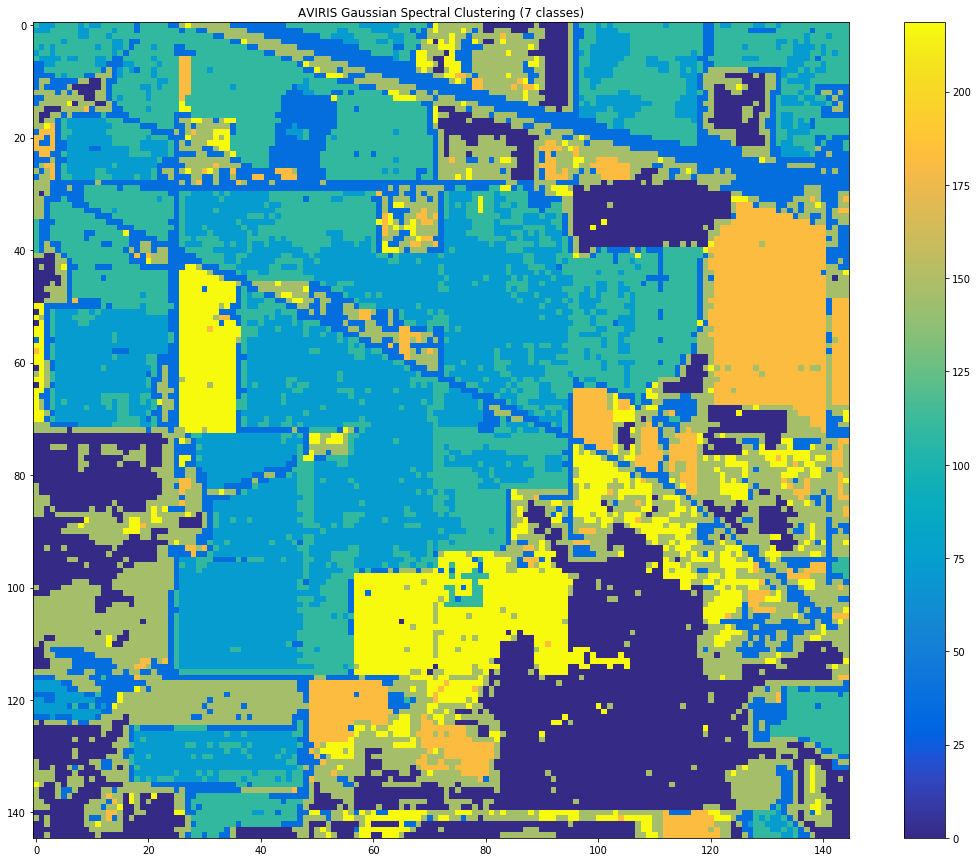

In [17]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))

fig.colorbar(im, ax=axs);

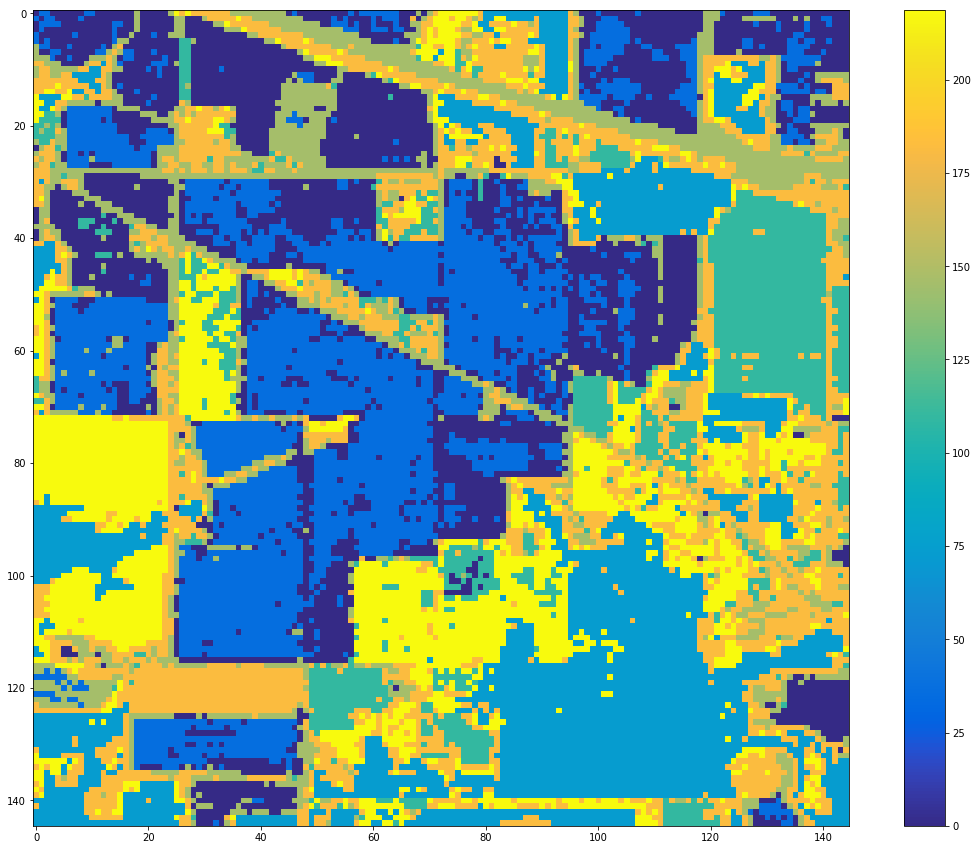

In [18]:
tmp = np.zeros([nl*ns])
tmp[valid_ixs] = final_class_ixs_masked
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

#im = axs.imshow(np.rot90(final_class_ixs_masked.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
im = axs.imshow((tmp.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

fig.colorbar(im, ax=axs);

In [19]:
from sklearn.cluster import KMeans

In [24]:
%%timeit
km = KMeans(n_clusters=num_classes, random_state=12345).fit(hsi_data_mat.transpose())

4.31 s ± 33.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


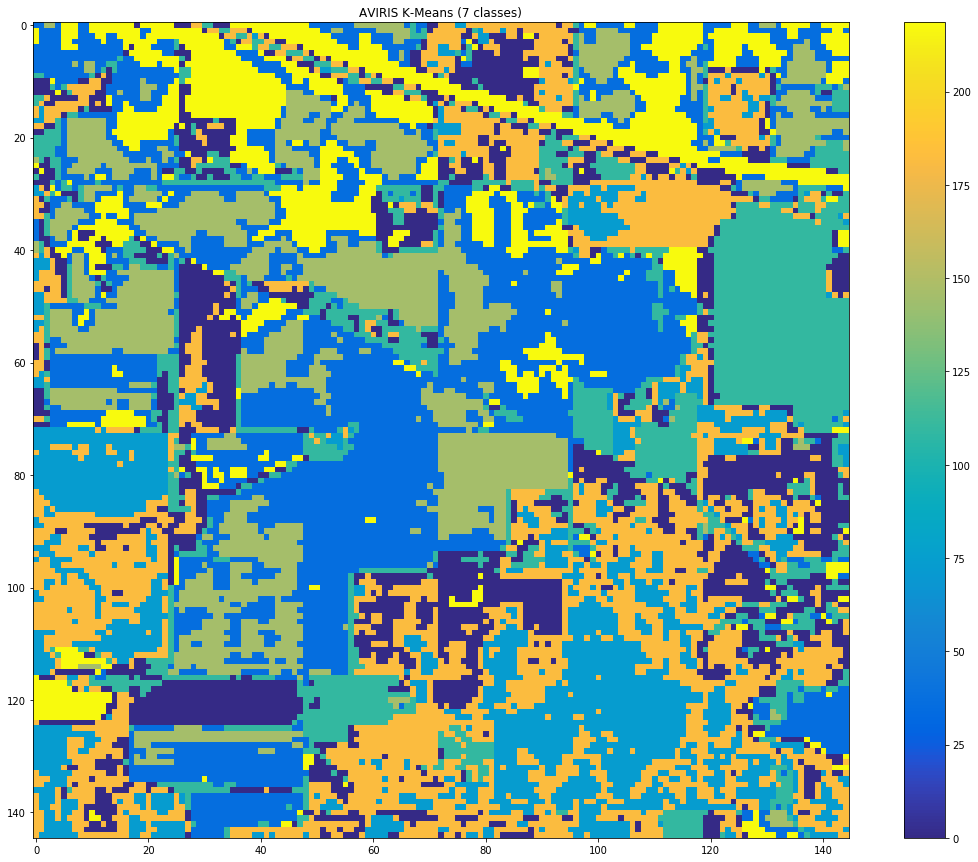

In [21]:
#fig, axs = plt.subplots(nrows=10, ncols=1);
nl, ns, nb = sz
fig, axs = plt.subplots(nrows=1, ncols=1);
cmap = plt.get_cmap('parula')

im = axs.imshow(km.labels_.reshape([nl, ns], order='F') * 255/num_classes, cmap=cmap);
#im = axs.imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
axs.set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
fig.colorbar(im, ax=axs);

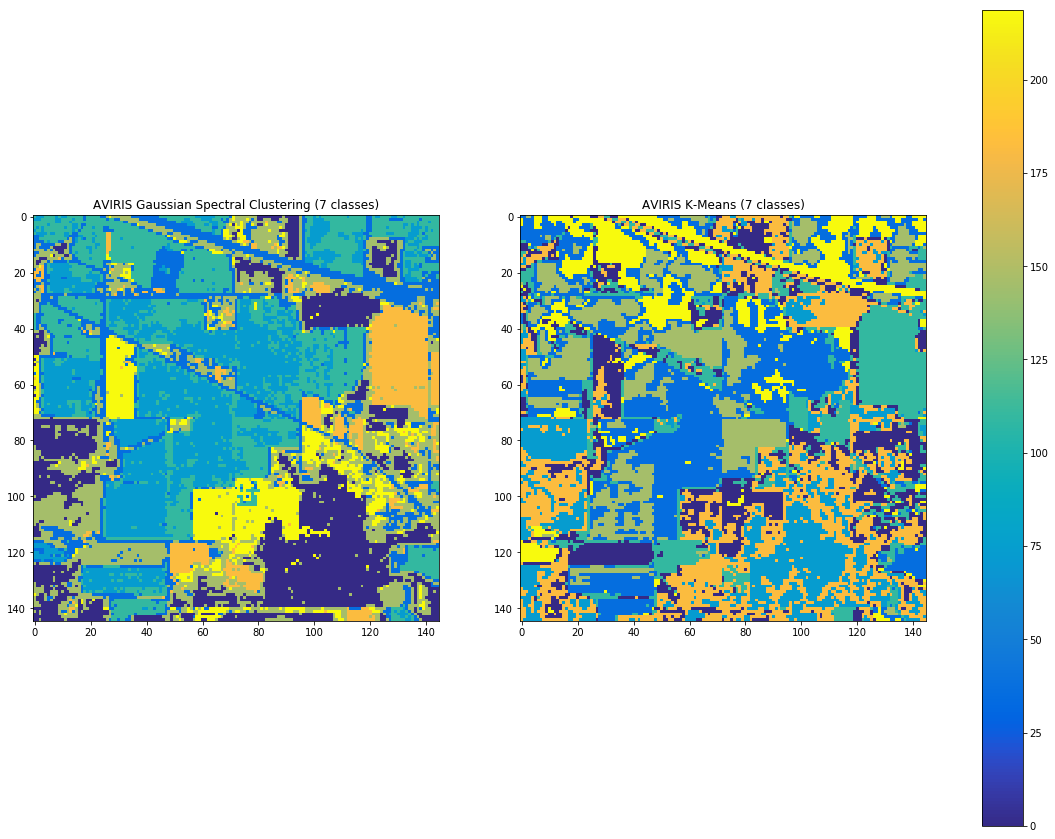

In [22]:
# Side by side comparison
fig, axs = plt.subplots(nrows=1, ncols=2);
cmap = plt.get_cmap('parula')

gsc_im = axs[0].imshow((final_class_ixs.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);
km_im = axs[1].imshow((km.labels_.reshape([nl, ns], order='F') * 255/num_classes), cmap=cmap);

axs[0].set_title('AVIRIS Gaussian Spectral Clustering ({} classes)'.format(num_classes))
axs[1].set_title('AVIRIS K-Means ({} classes)'.format(num_classes))
#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(gsc_im, ax=axs);